## KNTU_IPM Machine Learning

Classification



In [14]:
import numpy as np

import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data
from plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./deeplearning.mplstyle')

## Classification Problems
 Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign.
 
 In particular, these are examples of *binary* classification where there are two possible outcomes. 
 
 Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'. 

Plots of classification data sets often use symbols to indicate the outcome of an example. 

In [16]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

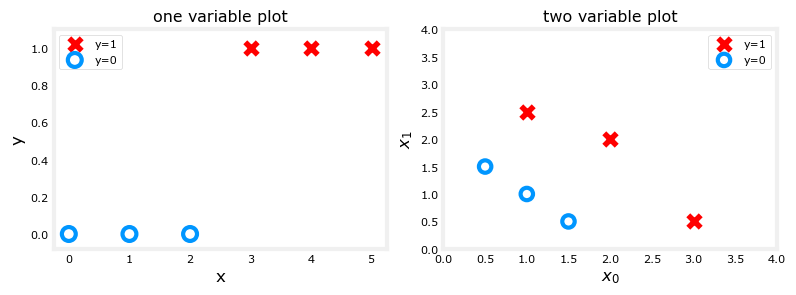

In [17]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()


Note in the plots above:
- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
   - Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    - Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

Let’s consider a problem where we classify whether a person is likely to enjoy a movie based on two features:

x₀: Number of hours spent watching movies per week (a continuous variable).

x₁: Average rating they give to movies on a scale from 0 to 5 (a continuous variable).

y: Binary label where y=1 means they enjoy the movie, and y=0 means they don’t.

For the one-variable case, I’ll use only the hours spent watching movies (x₀) to predict enjoyment.

x_train: Hours spent watching movies.

y_train: Enjoyment (0 or 1).

Assumption: People who watch more hours are more likely to enjoy movies, with a threshold around 5 hours.

In [18]:
import numpy as np

x_train = np.array([2.0, 3.5, 4.0, 5.5, 6.0, 7.0])
y_train = np.array([0, 0, 0, 1, 1, 1])

Here, if hours < 5, then y=0; if hours ≥ 5, then y=1.

Two-Variable Data

X_train2: Array of [hours watched, average rating].

y_train2: Enjoyment (0 or 1).

In [19]:
X_train2 = np.array([[2.0, 2.0], [3.0, 1.5], [4.0, 2.5], [5.0, 4.0], [6.0, 3.5], [5.5, 4.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

Fit a logistic regression model to the two-variable data.

Plot the decision boundary to show how the classifier separates the classes.

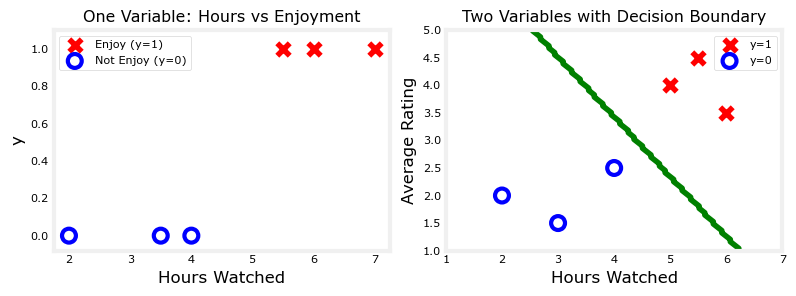

Coefficients (w1, w2): [[0.86 0.79]]
Intercept (w0): [-6.14]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# One-variable data
x_train = np.array([2.0, 3.5, 4.0, 5.5, 6.0, 7.0])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Two-variable data
X_train2 = np.array([[2.0, 2.0], [3.0, 1.5], [4.0, 2.5], [5.0, 4.0], [6.0, 3.5], [5.5, 4.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

# Define plotting function for two-variable data (assumed from the original code)
def plot_data(X, y, ax):
    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c='red', label="y=1")
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=100, label="y=0", facecolors='none', 
               edgecolors='blue', lw=3)
    ax.legend()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Plot 1: One-variable case
pos = y_train == 1
neg = y_train == 0
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label="Enjoy (y=1)")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="Not Enjoy (y=0)", 
              facecolors='none', edgecolors='blue', lw=3)
ax[0].set_ylim(-0.08, 1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('Hours Watched', fontsize=12)
ax[0].set_title('One Variable: Hours vs Enjoyment')
ax[0].legend()

# Plot 2: Two-variable case with classifier
plot_data(X_train2, y_train2, ax[1])
ax[1].set_ylabel('Average Rating', fontsize=12)
ax[1].set_xlabel('Hours Watched', fontsize=12)
ax[1].set_title('Two Variables with Decision Boundary')
ax[1].axis([1, 7, 1, 5])

# Fit logistic regression to two-variable data
model = LogisticRegression()
model.fit(X_train2, y_train2)

# Plot decision boundary
x0_min, x0_max = X_train2[:, 0].min() - 0.5, X_train2[:, 0].max() + 0.5
x1_min, x1_max = X_train2[:, 1].min() - 0.5, X_train2[:, 1].max() + 0.5
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 100), np.linspace(x1_min, x1_max, 100))
Z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
Z = Z.reshape(xx0.shape)
ax[1].contour(xx0, xx1, Z, levels=[0.5], colors='green')

plt.tight_layout()
plt.show()

# Print model parameters
print("Coefficients (w1, w2):", model.coef_)
print("Intercept (w0):", model.intercept_)

Classifier: Logistic regression fits a linear boundary of the form w0 + w1*x0 + w2*x1 = 0.

The coefficients and intercept define this line.

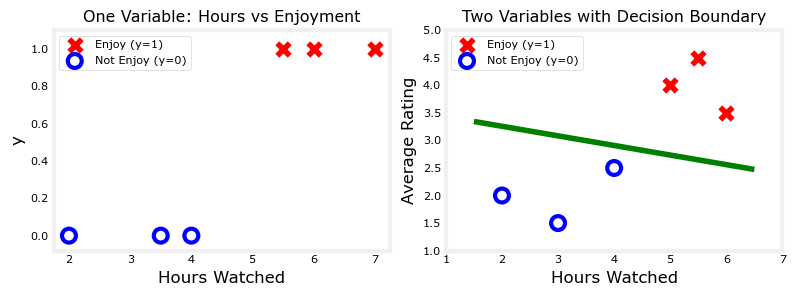

Coefficients from scratch (intercept, w1, w2): [-6.19  0.3   1.72]


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression from scratch
def logistic_regression(X, y, learning_rate=0.1, num_iterations=1000):
    m, n = X.shape
    beta = np.zeros(n)
    for _ in range(num_iterations):
        z = np.dot(X, beta)
        h = sigmoid(z)
        gradient = np.dot(X.T, h - y) / m
        beta -= learning_rate * gradient
    return beta

# Plotting function for two variables
def plot_data(X, y, ax):
    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c='red', label="Enjoy (y=1)")
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=100, label="Not Enjoy (y=0)", 
               facecolors='none', edgecolors='blue', lw=3)
    ax.legend()

# Sample data: hours watched, average rating, and enjoyment (0 or 1)
X_train2 = np.array([[2.0, 2.0], [3.0, 1.5], [4.0, 2.5], [5.0, 4.0], [6.0, 3.5], [5.5, 4.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

# Add intercept term
X_train2_with_intercept = np.hstack((np.ones((X_train2.shape[0], 1)), X_train2))

# Train model
beta = logistic_regression(X_train2_with_intercept, y_train2)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
# One-variable plot (simplified, using hours only)
x_train = np.array([2.0, 3.5, 4.0, 5.5, 6.0, 7.0])
y_train = np.array([0, 0, 0, 1, 1, 1])
pos = y_train == 1
neg = y_train == 0
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label="Enjoy (y=1)")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="Not Enjoy (y=0)", 
              facecolors='none', edgecolors='blue', lw=3)
ax[0].set_ylim(-0.08, 1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('Hours Watched', fontsize=12)
ax[0].set_title('One Variable: Hours vs Enjoyment')
ax[0].legend()

# Two-variable plot with decision boundary
plot_data(X_train2, y_train2, ax[1])
ax[1].set_ylabel('Average Rating', fontsize=12)
ax[1].set_xlabel('Hours Watched', fontsize=12)
ax[1].set_title('Two Variables with Decision Boundary')
x0_min, x0_max = X_train2[:, 0].min() - 0.5, X_train2[:, 0].max() + 0.5
x0 = np.linspace(x0_min, x0_max, 100)
x1 = - (beta[0] + beta[1]*x0) / beta[2]
ax[1].plot(x0, x1, 'g-')
ax[1].axis([1, 7, 1, 5])
plt.tight_layout()
plt.show()

print("Coefficients from scratch (intercept, w1, w2):", beta)

without sklearn, tune the learning rate and number of iterations manually, which can affect convergence.

For example, a learning rate too high might cause the model to diverge, while too low might take too long to converge.

Iteration 0, Cost: 0.6987
Iteration 100, Cost: 0.3164
Iteration 200, Cost: 0.2114
Iteration 300, Cost: 0.1618
Iteration 400, Cost: 0.1327
Iteration 500, Cost: 0.1135
Iteration 600, Cost: 0.0996
Iteration 700, Cost: 0.0891
Iteration 800, Cost: 0.0808
Iteration 900, Cost: 0.0741


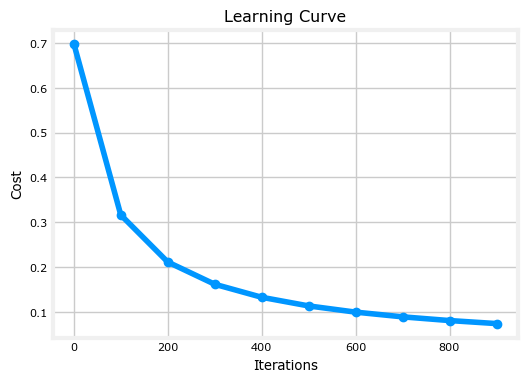

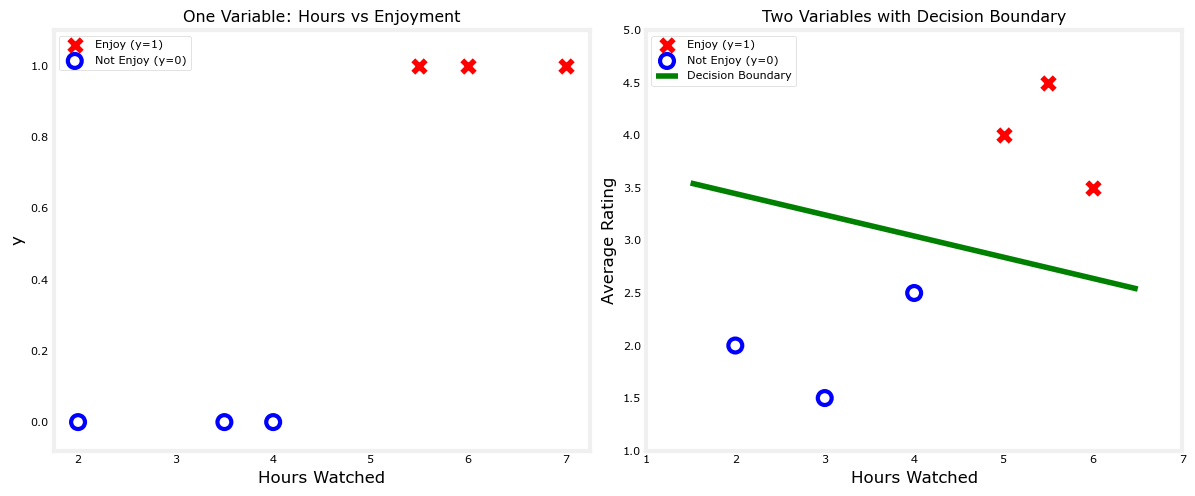

Coefficients from scratch (intercept, w1, w2): [-10.01   0.53   2.6 ]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost (log-loss) for logistic regression
def compute_cost(X, y, beta):
    m = len(y)
    h = sigmoid(np.dot(X, beta))
    epsilon = 1e-5  # Small value to avoid log(0)
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Logistic regression with cost tracking
def logistic_regression(X, y, learning_rate=0.02, num_iterations=1000):
    m, n = X.shape
    beta = np.zeros(n)
    costs = []
    for i in range(num_iterations):
        z = np.dot(X, beta)
        h = sigmoid(z)
        gradient = np.dot(X.T, h - y) / m
        beta -= learning_rate * gradient
        
        # Record cost every 100 iterations to monitor convergence
        if i % 100 == 0:
            cost = compute_cost(X, y, beta)
            costs.append(cost)
            print(f"Iteration {i}, Cost: {cost:.4f}")
    
    return beta, costs

# Plotting function for two variables (Hours Watched vs Average Rating)
def plot_data(X, y, ax):
    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c='red', label="Enjoy (y=1)")
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=100, label="Not Enjoy (y=0)", 
               facecolors='none', edgecolors='blue', lw=3)
    ax.legend()

# Sample data: hours watched, average rating, and enjoyment (0 or 1)
X_train2 = np.array([
    [2.0, 2.0],
    [3.0, 1.5],
    [4.0, 2.5],
    [5.0, 4.0],
    [6.0, 3.5],
    [5.5, 4.5]
])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

# Add intercept term to X
X_train2_with_intercept = np.hstack((np.ones((X_train2.shape[0], 1)), X_train2))

# Tuned hyperparameters
learning_rate = 0.3
num_iterations = 1000

# Train the logistic regression model
beta, costs = logistic_regression(X_train2_with_intercept, y_train2, learning_rate, num_iterations)

# Plot the learning curve to see cost convergence
plt.figure(figsize=(6, 4))
plt.plot(np.arange(0, num_iterations, 100), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

# Plot the results

# Left plot: One-variable visualization (Hours Watched vs Enjoyment)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
x_train = np.array([2.0, 3.5, 4.0, 5.5, 6.0, 7.0])
y_train = np.array([0, 0, 0, 1, 1, 1])
pos = y_train == 1
neg = y_train == 0
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label="Enjoy (y=1)")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="Not Enjoy (y=0)", 
              facecolors='none', edgecolors='blue', lw=3)
ax[0].set_ylim(-0.08, 1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('Hours Watched', fontsize=12)
ax[0].set_title('One Variable: Hours vs Enjoyment')
ax[0].legend()

# Right plot: Two-variable visualization with decision boundary
plot_data(X_train2, y_train2, ax[1])
ax[1].set_ylabel('Average Rating', fontsize=12)
ax[1].set_xlabel('Hours Watched', fontsize=12)
ax[1].set_title('Two Variables with Decision Boundary')
x0_min, x0_max = X_train2[:, 0].min() - 0.5, X_train2[:, 0].max() + 0.5
x0 = np.linspace(x0_min, x0_max, 100)
# Decision boundary: beta[0] + beta[1]*x0 + beta[2]*x1 = 0  ->  x1 = -(beta[0] + beta[1]*x0) / beta[2]
x1 = - (beta[0] + beta[1]*x0) / beta[2]
ax[1].plot(x0, x1, 'g-', label='Decision Boundary')
ax[1].axis([1, 7, 1, 5])
ax[1].legend()

plt.tight_layout()
plt.show()

print("Coefficients from scratch (intercept, w1, w2):", beta)
